<a href="https://colab.research.google.com/github/bjhaj/Digit-Classifer-Project/blob/master/digitclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

#The train_images and train_labels arrays are the training set—the data the model uses to learn.
#The model is tested against the test set, the test_images, and test_labels arrays.

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

#pre-process the images
train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential ([
#transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).
keras.layers.Flatten(input_shape = (28,28,1)),
#After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(10)
])

#loss function shows how accurate our model is
#optimizer updates the model based on loss function and data it sees
#metrics - monitors training and testing steps (this example uses accuracy metric)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
#fit the model to the training data
model.fit(train_images, train_labels, epochs=10)
model.summary()
#check the accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('The model has a test accuracy of: ', test_acc)

#time to test the now trained model on some new images!
#the probability model converts our model from logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

#first prediction
np.argmax(predictions[0])






In [ ]:
predictions1 = model.predict(test_images)
np.argmax(predictions1[0])


7

7


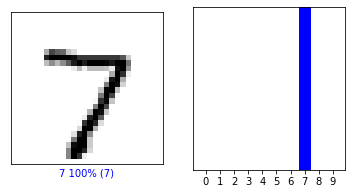

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

#first prediction
print(class_names[np.argmax(predictions[0])])

#defines what the image of the plot will look like
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
#create a graph
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

3


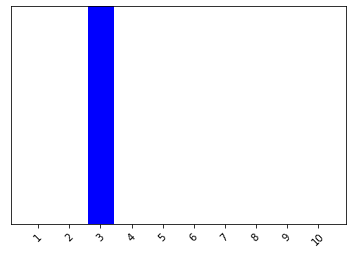

In [ ]:
img = test_images[1]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
print(class_names[np.argmax(predictions_single)])





In [ ]:
#convert to js for use in web apps etc
!pip install tensorflowjs
model.save('keras.h5')
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

!zip -r model.zip model 
from google.colab import files
files.download('model.zip')

     |████████████████████████████████| 61kB 2.1MB/s 
     |████████████████████████████████| 92kB 5.2MB/s 
     |████████████████████████████████| 137.3MB 81kB/s 
     |████████████████████████████████| 256kB 40.8MB/s 
     |████████████████████████████████| 921kB 43.9MB/s 
     |████████████████████████████████| 460kB 38.2MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=ad5c921f036b0d1d4079c7f3398e1acda1b36fc3cfb3e3cb957572616ec887f5
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygment

mkdir: cannot create directory ‘model’: File exists
updating: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 7%)
  adding: model/model.json (deflated 68%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
probability_model.save('keras.h5')
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

!zip -r model.zip model 
from google.colab import files
files.download('model.zip')

mkdir: cannot create directory ‘model’: File exists
updating: model/ (stored 0%)
updating: model/group1-shard1of1.bin (deflated 7%)
updating: model/model.json (deflated 73%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>